In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importing yfinance library to help us gathering data from Yahoo finance
import yfinance as yf
# Importing datetime and calendar to handling the change from dates to day names
from datetime import datetime
import calendar
%matplotlib inline 

### Let's find out best days to invest in NASAQ 100

In [2]:
# Accessing ticker data using Ticker moudle in yfinance library 
nasdaq100 = yf.Ticker("NDX")

In [3]:
# Getting NASDAQ 100 informations
nasdaq100.info

{'symbol': 'NDX',
 'quoteType': 'MUTUALFUND',
 'exchange': 'YHD',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'gmtOffSetMilliseconds': '-14400000',
 'market': 'us_market',
 'isEsgPopulated': False,
 'quoteSourceName': 'Delayed Quote',
 'regularMarketOpen': None,
 'averageDailyVolume3Month': 0,
 'regularMarketTime': 1561759658,
 'volume24Hr': None,
 'regularMarketDayHigh': None,
 'shortName': None,
 'averageDailyVolume10Day': 0,
 'longName': None,
 'regularMarketChange': None,
 'regularMarketPreviousClose': None,
 'preMarketPrice': None,
 'exchangeDataDelayedBy': 0,
 'toCurrency': None,
 'postMarketChange': None,
 'postMarketPrice': None,
 'exchangeName': 'YHD',
 'preMarketChange': None,
 'circulatingSupply': None,
 'regularMarketDayLow': None,
 'priceHint': 2,
 'regularMarketPrice': None,
 'regularMarketVolume': None,
 'lastMarket': None,
 'regularMarketSource': 'DELAYED',
 'openInterest': None,
 'marketState': 'CLOSED',
 'underlyingSymbol': None,

In [4]:
# Getting all history data
data_nasdaq100 = yf.download('NDX')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Printing the data which is a pandas DataFrame 
data_nasdaq100

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000
...,...,...,...,...,...,...
2022-09-12,12649.230469,12752.830078,12639.759766,12739.719727,12739.719727,4146680000
2022-09-13,12364.830078,12420.009766,12004.419922,12033.620117,12033.620117,5188380000
2022-09-14,12092.030273,12170.250000,12016.429688,12134.400391,12134.400391,4861530000


In [6]:
# I created new column name Date, with data of index
data_nasdaq100['Date'] = data_nasdaq100.index

In [7]:
# I created a lambda function so i can get the names of days from date
data_nasdaq100['dayName'] = data_nasdaq100['Date'].apply(lambda x : calendar.day_name[x.weekday()])

In [8]:
# Printing the dataframe
data_nasdaq100

,Open,High,Low,Close,Adj Close,Volume,Date,dayName
Date,,,,,,,,
1985-10-01,110.620003,112.160004,110.565002,112.139999,112.139999,153160000,1985-10-01,Tuesday
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,1985-10-02,Wednesday
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,1985-10-03,Thursday
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,1985-10-04,Friday
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,1985-10-07,Monday
...,...,...,...,...,...,...,...,...
2022-09-12,12649.230469,12752.830078,12639.759766,12739.719727,12739.719727,4146680000,2022-09-12,Monday
2022-09-13,12364.830078,12420.009766,12004.419922,12033.620117,12033.620117,5188380000,2022-09-13,Tuesday
2022-09-14,12092.030273,12170.250000,12016.429688,12134.400391,12134.400391,4861530000,2022-09-14,Wednesday


In [9]:
# Calculating the daily simple return 'DSR' and stock it in column named DSR
data_nasdaq100['DSR'] = data_nasdaq100['Adj Close'].pct_change()

In [10]:
# Droping all nan vaules
data_nasdaq100.dropna(inplace=True)

In [11]:
data_nasdaq100

,Open,High,Low,Close,Adj Close,Volume,Date,dayName,DSR
Date,,,,,,,,,
1985-10-02,112.139999,112.540001,110.779999,110.824997,110.824997,164640000,1985-10-02,Wednesday,-0.011726
1985-10-03,110.839996,111.184998,110.120003,110.870003,110.870003,147300000,1985-10-03,Thursday,0.000406
1985-10-04,110.870003,110.870003,109.855003,110.074997,110.074997,147900000,1985-10-04,Friday,-0.007171
1985-10-07,110.074997,110.135002,108.175003,108.199997,108.199997,128640000,1985-10-07,Monday,-0.017034
1985-10-08,108.199997,108.269997,106.750000,107.160004,107.160004,144100000,1985-10-08,Tuesday,-0.009612
...,...,...,...,...,...,...,...,...,...
2022-09-12,12649.230469,12752.830078,12639.759766,12739.719727,12739.719727,4146680000,2022-09-12,Monday,0.012029
2022-09-13,12364.830078,12420.009766,12004.419922,12033.620117,12033.620117,5188380000,2022-09-13,Tuesday,-0.055425
2022-09-14,12092.030273,12170.250000,12016.429688,12134.400391,12134.400391,4861530000,2022-09-14,Wednesday,0.008375


In [12]:
# Creating new df grouped by dayName and mean values of DSR
df_nasdaq100 = data_nasdaq100.groupby('dayName').mean()
df_nasdaq100

,Open,High,Low,Close,Adj Close,Volume,DSR
dayName,,,,,,,
Friday,2784.768533,2805.805939,2759.463133,2783.875888,2783.875888,1.562819e+09,-0.000015
Monday,2761.203034,2783.538007,2737.208357,2762.283776,2762.283776,1.452634e+09,-0.000058
Thursday,2797.924274,2822.442158,2773.393365,2799.553604,2799.553604,1.589802e+09,0.000784
Tuesday,2791.888912,2814.448241,2766.869656,2791.262649,2791.262649,1.555637e+09,0.000712
Wednesday,2790.449395,2814.611649,2766.210353,2791.501415,2791.501415,1.589567e+09,0.001697


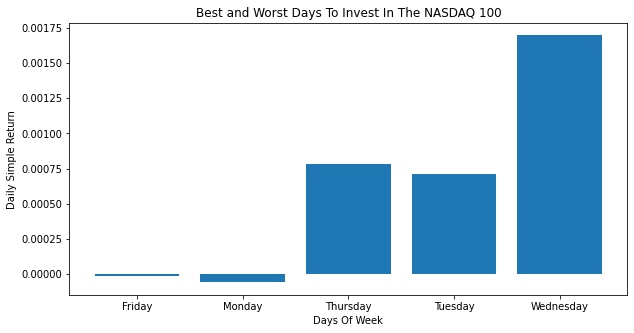

In [13]:
# Plotting the data
fig_nasdaq100 = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_nasdaq100.index, df_nasdaq100['DSR'])
 
plt.xlabel("Days Of Week")
plt.ylabel("Daily Simple Return")
plt.title("Best and Worst Days To Invest In The NASDAQ 100")
plt.show()